## Setup

We start by downloading and preparing the dataset for you. The training images are in `train_images` and the testing images are in `test_images`.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Filter the data for binary classification task: "T-shirt/top" (class 0) vs. "Trouser" (class 1)
def filter_images(images, labels):
    keep = (labels == 0) | (labels == 1)  # Keep only labels 0 and 1
    new_images = images[keep]
    new_labels = labels[keep]
    return new_images, new_labels

train_images, train_labels = filter_images(train_images, train_labels)
test_images, test_labels = filter_images(test_images, test_labels)

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


4422102/4422102 [==============================] - 8s 2us/step


The code below displays some images in the training and testing sets

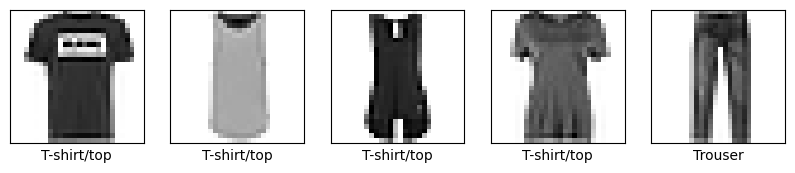

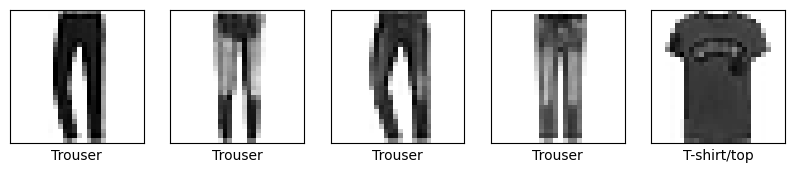

In [2]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(['T-shirt/top', 'Trouser'][labels[i]])
    plt.show()

# Display images from the training set
display_images(train_images, train_labels)

# Display images from the testing set
display_images(test_images, test_labels)

Your task now is to train a CNN that can correctly distinguish between T-shirts and trousers with almost 100% accuracy.\

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you've already filtered train_images, train_labels, test_images, and test_labels
# And added a channel dimension to your images

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(128, (4,4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 25, 25, 128)       2176      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 12, 12, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_24 (Flatten)        (None, 18432)             0         
                                                                 
 dense_58 (Dense)            (None, 32)                589856    
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 592065 (2.26 MB)
Trainable params: 592065 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________